In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt

In [5]:
df= pd.read_csv("data.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
vehicle_value    67062 non-null float64
exposure         67856 non-null float64
claim            67856 non-null int64
claim_count      67856 non-null int64
claim_cost       67856 non-null float64
vehicle_type     67856 non-null object
vehicle_age      67185 non-null float64
owner_gender     67856 non-null object
owner_area       67856 non-null object
owner_age        66289 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 5.2+ MB


In [16]:
df.columns[list(df.isnull().sum()>0)]

Index(['vehicle_value', 'vehicle_age', 'owner_age'], dtype='object')

In [26]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

owner_age        2.309302
vehicle_value    1.170125
vehicle_age      0.988859
owner_area       0.000000
owner_gender     0.000000
vehicle_type     0.000000
claim_cost       0.000000
claim_count      0.000000
claim            0.000000
exposure         0.000000
dtype: float64

In [20]:
df.shape[0]

67856

In [29]:
df.groupby('vehicle_type').count()

,vehicle_value,exposure,claim,claim_count,claim_cost,vehicle_age,owner_gender,owner_area,owner_age
vehicle_type,,,,,,,,,
HBACK,18670,18892,18892,18892,18892,18689,18892,18892,18449
HBACK#.,1,1,1,1,1,1,1,1,1
HBACK.49,1,1,1,1,1,1,1,1,1
HBACK@,1,1,1,1,1,1,1,1,1
HDTOP,1556,1577,1577,1577,1577,1558,1577,1577,1533
OTHER,2503,2532,2532,2532,2532,2506,2532,2532,2482
SEDAN,21938,22200,22200,22200,22200,21992,22200,22200,21669
SEDAN#.,1,1,1,1,1,1,1,1,1
SEDAN&&,2,2,2,2,2,2,2,2,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
vehicle_value    67856 non-null float64
exposure         67856 non-null float64
claim            67856 non-null int64
claim_count      67856 non-null int64
claim_cost       67856 non-null float64
vehicle_type     67856 non-null object
vehicle_age      67856 non-null float64
owner_gender     67856 non-null object
owner_area       67856 non-null object
owner_age        67856 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 5.2+ MB


In [47]:
df.loc[:,list(df.dtypes!=object)].fillna(df.median(), inplace=True)

#df.fillna(df.median(), inplace=True)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
vehicle_value    67856 non-null float64
exposure         67856 non-null float64
claim            67856 non-null int64
claim_count      67856 non-null int64
claim_cost       67856 non-null float64
vehicle_type     67856 non-null object
vehicle_age      67856 non-null float64
owner_gender     67856 non-null object
owner_area       67856 non-null object
owner_age        67856 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 5.2+ MB


In [54]:
name = df.vehicle_type.unique()
name

array(['HBACK', 'UTE', 'STNWG', 'HDTOP', 'OTHER', 'SEDAN', 'TRUCK',
       'stnwg', 'STNWG/', 'sedan', 'STNWG^', 'hback', 'ute', 'SEDAN#.',
       'hdtop', 'SEDAN&&', 'truck', 'SEDAN@', 'STNWG.49', 'STNWG@',
       'HBACK#.', 'SEDAN.49', 'HBACK.49', 'HBACK@'], dtype=object)

In [58]:
type(name)

numpy.ndarray

In [63]:
col = df.vehicle_type
col

0        HBACK
1        HBACK
2          UTE
3        STNWG
4        HBACK
         ...  
67851    SEDAN
67852    SEDAN
67853    STNWG
67854    HBACK
67855    HBACK
Name: vehicle_type, Length: 67856, dtype: object

In [70]:
df['vehicle_type']=df.vehicle_type.str.replace('[^a-zA-Z]', '').str.upper()

In [72]:
df.vehicle_type.unique()

array(['HBACK', 'UTE', 'STNWG', 'HDTOP', 'OTHER', 'SEDAN', 'TRUCK'],
      dtype=object)

In [77]:
df['vehicle_value_cat']=pd.cut(df.vehicle_value, [0, 20000, 60000, 100000, np.inf], right=False, labels=['LOW','MIDDLE','HIGH','VERY HIGH'])

In [81]:
df.tail()

,vehicle_value,exposure,claim,claim_count,claim_cost,vehicle_type,vehicle_age,owner_gender,owner_area,owner_age,vehicle_value_cat
67851,10700.0,0.654346,0,0,0.000000,SEDAN,2.0,M,A,6.0,LOW
67852,12300.0,0.908966,0,0,0.000000,SEDAN,4.0,M,C,3.0,LOW
67853,19300.0,0.312115,0,0,0.000000,STNWG,4.0,M,C,3.0,LOW
67854,9700.0,0.320329,1,1,7646.769989,HBACK,3.0,F,C,2.0,LOW
67855,10200.0,0.246407,0,0,0.000000,HBACK,3.0,M,A,1.0,LOW


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 11 columns):
vehicle_value        67856 non-null float64
exposure             67856 non-null float64
claim                67856 non-null int64
claim_count          67856 non-null int64
claim_cost           67856 non-null float64
vehicle_type         67856 non-null object
vehicle_age          67856 non-null float64
owner_gender         67856 non-null object
owner_area           67856 non-null object
owner_age            67856 non-null float64
vehicle_value_cat    67856 non-null category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 5.2+ MB


In [87]:
df.loc[:,df.dtypes.isin()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [90]:
df_num = df.select_dtypes(include=np.number).drop(['claim','claim_count','exposure'], axis=1)

In [98]:
df_num=(df_num-df_num.mean())/df_num.std()

In [99]:
df_new = df.copy()

In [101]:
for col_name in df_num:
    df_new[col_name] = df_num[col_name]
df_new

,vehicle_value,exposure,claim,claim_count,claim_cost,vehicle_type,vehicle_age,owner_gender,owner_area,owner_age,vehicle_value_cat
0,-0.595637,0.303901,0,0,-0.129954,HBACK,0.303386,F,C,-1.045771,LOW
1,-0.620657,0.648871,0,0,-0.129954,HBACK,-0.637542,F,A,0.372104,LOW
2,1.239177,0.569473,0,0,-0.129954,UTE,-0.637542,F,E,-1.045771,MIDDLE
3,1.973103,0.317591,0,0,-0.129954,STNWG,-0.637542,F,D,-1.045771,MIDDLE
4,-0.879199,0.648871,0,0,-0.129954,HBACK,1.244313,F,C,-1.045771,LOW
...,...,...,...,...,...,...,...,...,...,...,...
67851,-0.587297,0.654346,0,0,-0.129954,SEDAN,-0.637542,M,A,1.789979,LOW
67852,-0.453856,0.908966,0,0,-0.129954,SEDAN,1.244313,M,C,-0.336833,LOW
67853,0.129949,0.312115,0,0,-0.129954,STNWG,1.244313,M,C,-0.336833,LOW
67854,-0.670698,0.320329,1,1,7.109264,HBACK,0.303386,F,C,-1.045771,LOW


In [102]:
df_num

,vehicle_value,claim_cost,vehicle_age,owner_age
0,-0.595637,-0.129954,0.303386,-1.045771
1,-0.620657,-0.129954,-0.637542,0.372104
2,1.239177,-0.129954,-0.637542,-1.045771
3,1.973103,-0.129954,-0.637542,-1.045771
4,-0.879199,-0.129954,1.244313,-1.045771
...,...,...,...,...
67851,-0.587297,-0.129954,-0.637542,1.789979
67852,-0.453856,-0.129954,1.244313,-0.336833
67853,0.129949,-0.129954,1.244313,-0.336833
67854,-0.670698,7.109264,0.303386,-1.045771


In [104]:
df_new2=pd.get_dummies(df_new)

In [106]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 26 columns):
vehicle_value                  67856 non-null float64
exposure                       67856 non-null float64
claim                          67856 non-null int64
claim_count                    67856 non-null int64
claim_cost                     67856 non-null float64
vehicle_age                    67856 non-null float64
owner_age                      67856 non-null float64
vehicle_type_HBACK             67856 non-null uint8
vehicle_type_HDTOP             67856 non-null uint8
vehicle_type_OTHER             67856 non-null uint8
vehicle_type_SEDAN             67856 non-null uint8
vehicle_type_STNWG             67856 non-null uint8
vehicle_type_TRUCK             67856 non-null uint8
vehicle_type_UTE               67856 non-null uint8
owner_gender_F                 67856 non-null uint8
owner_gender_M                 67856 non-null uint8
owner_area_A                   67856 non-null uin

In [110]:
y = df_new2['claim_cost']
df_new2.drop(['claim_cost'], axis=1, inplace=True)

In [113]:
y

0       -0.129954
1       -0.129954
2       -0.129954
3       -0.129954
4       -0.129954
           ...   
67851   -0.129954
67852   -0.129954
67853   -0.129954
67854    7.109264
67855   -0.129954
Name: claim_cost, Length: 67856, dtype: float64

In [115]:
model = LinearRegression().fit(df_new2,y)


In [121]:
res = model.predict(df_new2)

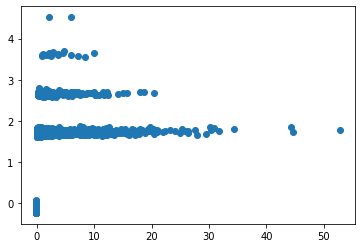

In [123]:
plt.scatter(y, res)